# EXAM 1 REVIEW

## Basic ANOVA Model - Weight Loss Data

* Start be reading the data and generating information about our model

In [4]:
data1 = read.table('Data_WeightLoss.txt', header=TRUE)
attach(data1)

# generate model, make conclusions
model1 = aov(weight_loss~program)
anova(model1)

The following objects are masked from data1 (pos = 3):

    program, weight_loss




,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
program,2,51.66868,25.834339,13.58198,7.354852e-06
Residuals,87,165.48302,1.902104,NA,NA


* Check the normality to see if the ANOVA model works:


	Shapiro-Wilk normality test

data:  model1$resid
W = 0.96574, p-value = 0.01786


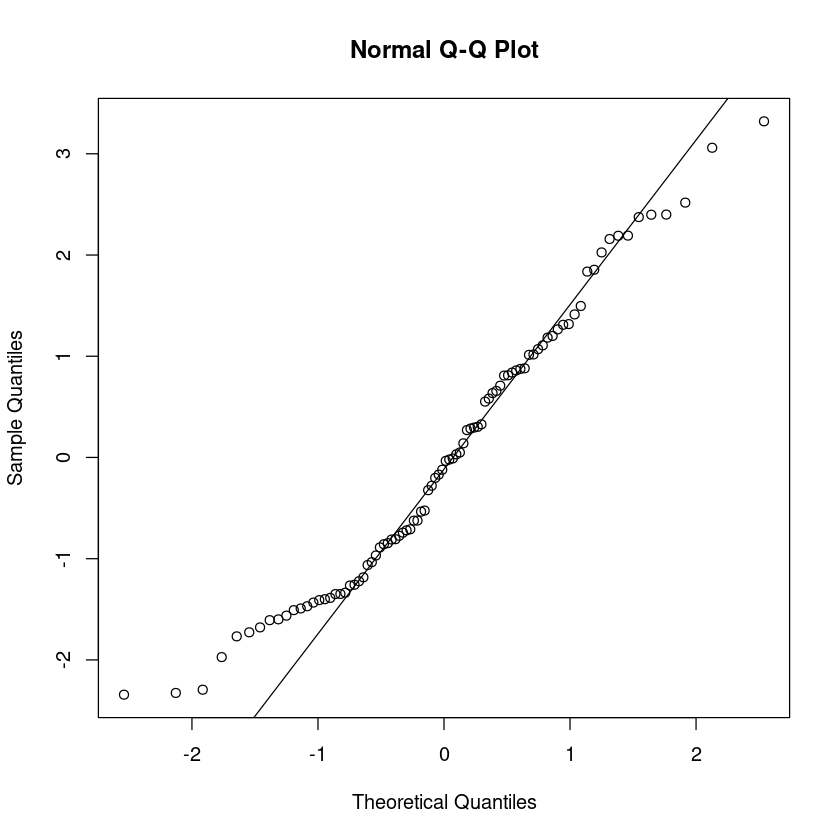

In [6]:
# check the normality to see if the model works, make conclusions
qqnorm(model1$resid)
qqline(model1$resid)

shapiro.test(model1$resid)

p-value small so we can go with this model!

* Check the variance for the model:

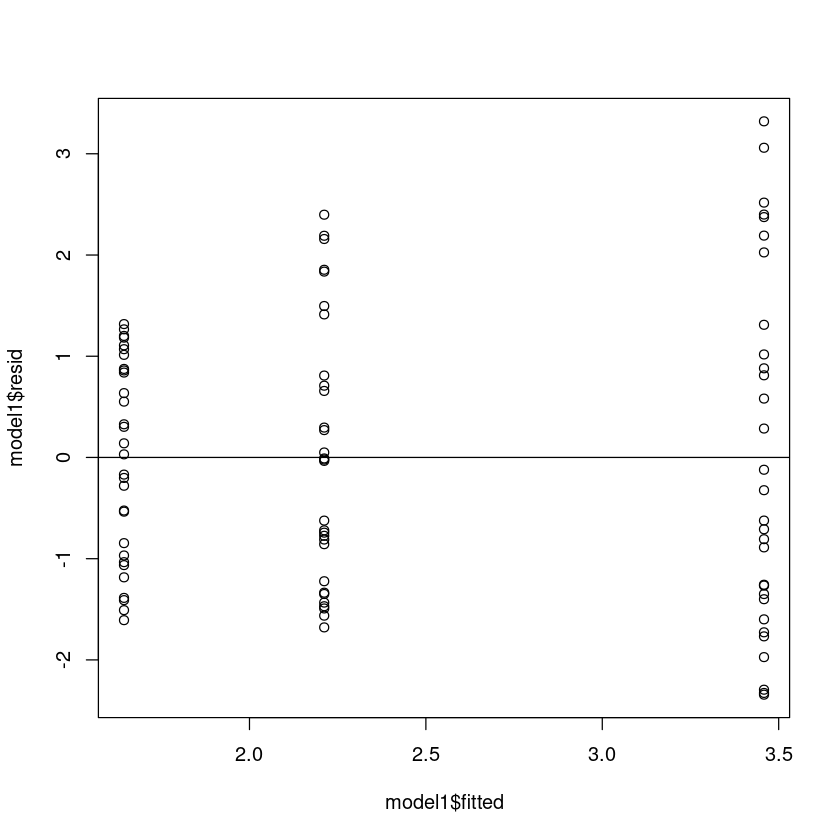

In [7]:
# check the variance - the variance is INCREASING so what we are doing is not really correct
plot(model1$fitted, model1$resid)
abline(h=0)

The variance is clearly increasing so the variance is NOT constant.

* Use the Tukey test to get more information:

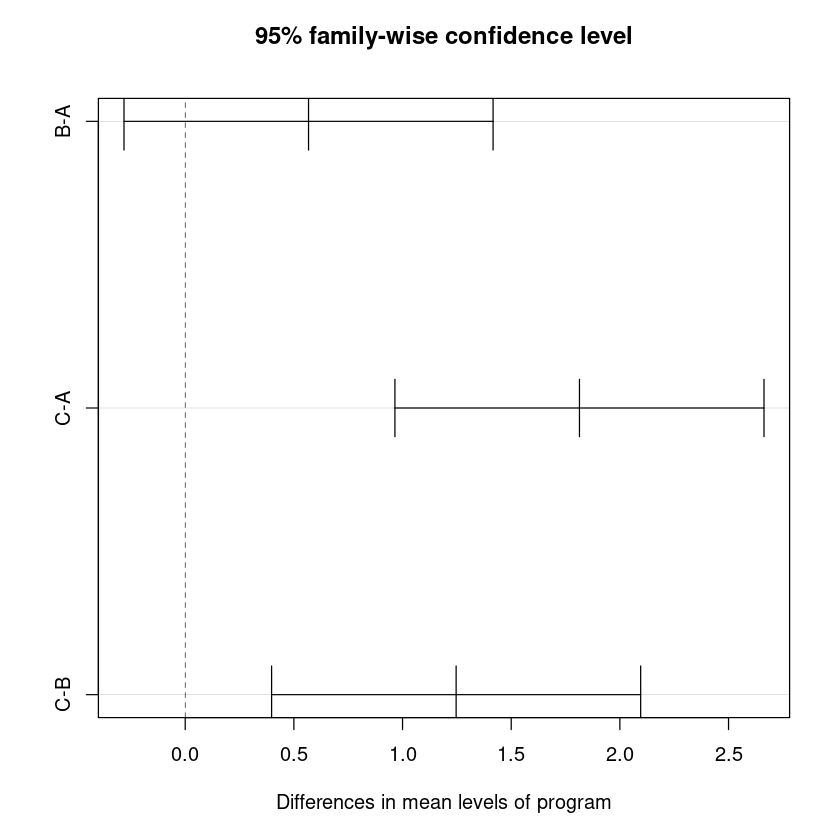

In [8]:
plot(TukeyHSD(model1, conf.level=0.95))

B-A contains 0 so there is no difference. C-A and C-B do not have 0 so these do have a difference

* check for equality of variance

In [9]:
library(car)
leveneTest(weight_loss~program)

Loading required package: carData

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,5.557465,0.005353167
,87,NA,NA


p-value small so there is some variability - the variance is NOT constant

## $2^k$ PRACTICE

* Start by reading the data and generating the model

In [10]:
A =rep(c(-1,1), times=8)
B =rep(c(-1,1), each = 2, times=4)
C =rep(c(-1,1), each = 4, times=2)
D =rep(c(-1,1), each = 8)
y =c(45, 71, 48, 65, 68, 60, 80, 65, 43, 100, 45, 104, 75, 86, 70, 96)
data2 <- data.frame(A, B, C, D, y)
data2

A,B,C,D,y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1,-1,-1,-1,45
1,-1,-1,-1,71
-1,1,-1,-1,48
1,1,-1,-1,65
-1,-1,1,-1,68
1,-1,1,-1,60
-1,1,1,-1,80
1,1,1,-1,65
-1,-1,-1,1,43


* Fit a MLR model (keep in mind that all of your values have to be numeric!)

In [11]:
model2 = lm(y~A*B*C*D)
summary(model2)


Call:
lm(formula = y ~ A * B * C * D)

Residuals:
ALL 16 residuals are 0: no residual degrees of freedom!

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  70.0625        NaN     NaN      NaN
A            10.8125        NaN     NaN      NaN
B             1.5625        NaN     NaN      NaN
C             4.9375        NaN     NaN      NaN
D             7.3125        NaN     NaN      NaN
A:B           0.0625        NaN     NaN      NaN
A:C          -9.0625        NaN     NaN      NaN
B:C           1.1875        NaN     NaN      NaN
A:D           8.3125        NaN     NaN      NaN
B:D          -0.1875        NaN     NaN      NaN
C:D          -0.5625        NaN     NaN      NaN
A:B:C         0.9375        NaN     NaN      NaN
A:B:D         2.0625        NaN     NaN      NaN
A:C:D        -0.8125        NaN     NaN      NaN
B:C:D        -1.3125        NaN     NaN      NaN
A:B:C:D       0.6875        NaN     NaN      NaN

Residual standard error: NaN on 0 degrees of

Our degrees of freedom are 0, so we are unable to calculate an errors, t-statistics, and p-values!

* Generate the half normal probability plots

In [15]:
data.frame(model2$coef)

,model2.coef
,<dbl>
(Intercept),70.0625
A,10.8125
B,1.5625
C,4.9375
D,7.3125
A:B,0.0625
A:C,-9.0625
B:C,1.1875
A:D,8.3125


zscore= 0.0417893 0.1256613 0.2104284 0.2967378 0.3853205 0.4770404 0.5729675 0.6744898 0.7835004 0.9027348 1.036433 1.191816 1.382994 1.644854 2.128045effp= 0.0625 0.1875 0.5625 0.6875 0.8125 0.9375 1.1875 1.3125 1.5625 2.0625 4.9375 7.3125 8.3125 9.0625 10.8125

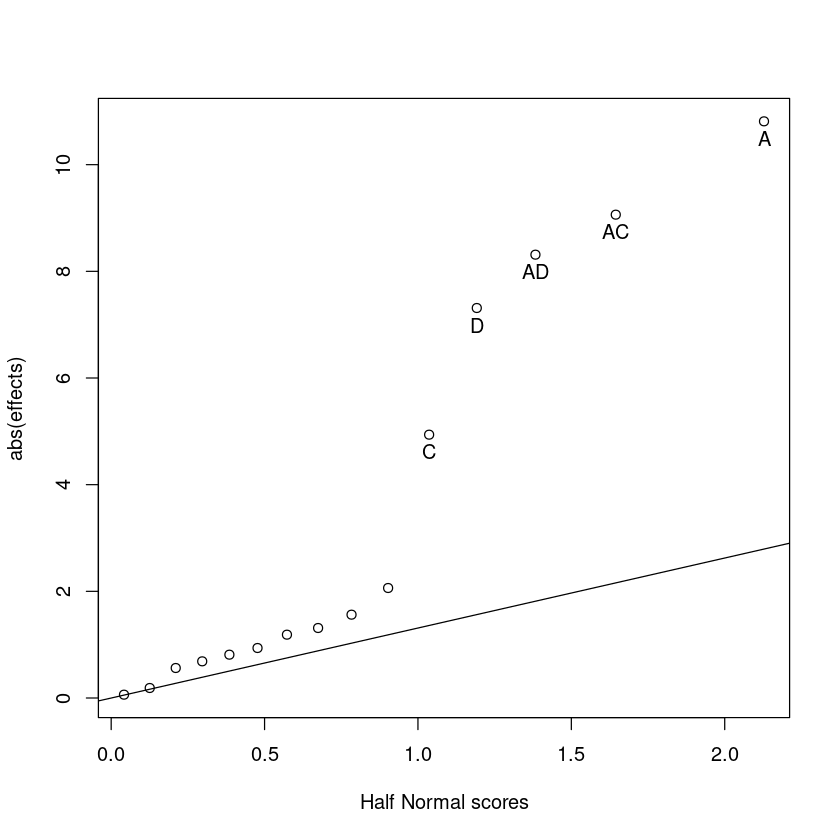

In [12]:
library(daewr)
halfnorm(model2$coef[-1], labs=names(model$ceof[-1]))

* We have a ranking of importance based on the plot, so let's go from there with a new model

In [16]:
model3 = lm(y~A+C+D+A*D+A*C)
summary(model3)


Call:
lm(formula = y ~ A + C + D + A * D + A * C)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3750 -1.5000  0.0625  2.9062  5.7500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   70.062      1.104  63.444 2.30e-14 ***
A             10.812      1.104   9.791 1.93e-06 ***
C              4.938      1.104   4.471   0.0012 ** 
D              7.313      1.104   6.622 5.92e-05 ***
A:D            8.313      1.104   7.527 2.00e-05 ***
A:C           -9.062      1.104  -8.206 9.41e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.417 on 10 degrees of freedom
Multiple R-squared:  0.966,	Adjusted R-squared:  0.9489 
F-statistic: 56.74 on 5 and 10 DF,  p-value: 5.14e-07


* Now each of our terms (as well as their interaction with each other) are significant!
* Try generating an interaction plot now

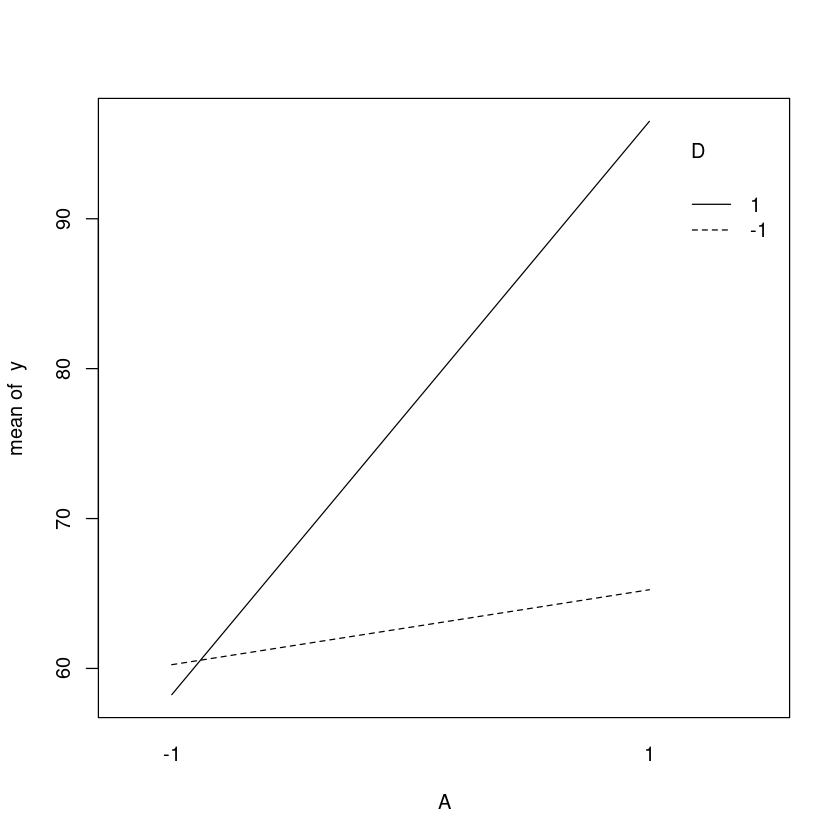

In [22]:
interaction.plot(A,D,y)

If the lines cross each other, then we have interaction. In this case the lines cross, so we do have some interaction!

From this interaction plot, since we are looking for the HIGHEST outcome, we read up from $A=1$ and see that the highest value is $D=1$. READ THE QUESTION CAREFULLY TO SEE WHAT LEVEL YOU NEED TO READ FROM

* Draw the contour plot so that we can draw some conclusions from it

In [26]:
A1= seq(-1,1,length.out=100)
C1= seq(-1,1,length.out=100)
tmp= list(A=A1,C=C1)
new= expand.grid(tmp)
new$D=rep(1,100*100)
new$fit= c(predict(model2,new))

ERROR: Error in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels): variable lengths differ (found for 'B')


In [27]:
library(lattice)
contourplot(fit~A*C,data=new,region=T)

ERROR: Error in eval(i, data, env): object 'fit' not found
